In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob
#import zarr
import allel

In this notebook I will compare diversity levels in Guinea and Kindae baboons between the old baboondiversity and the new primatediversity.

In [2]:
"../results/window_stats/Papio_cynocephalus_ssp_100kb_het.txt"

'../results/window_stats/Papio_cynocephalus_ssp_100kb_het.txt'

In [3]:
d = pd.read_csv("../results/window_stats/Papio_cynocephalus_ssp_100kb_het.txt", sep="\t", index_col=[0])
d["species"] = "Papio_cynocephalus_ssp"
df_new_yellow = pd.melt(d, id_vars=["chrom", "window_start", "window_end", "callable_frac", "species"], var_name="GVCF_ID", value_name="het")

In [4]:
df_new_yellow

,chrom,window_start,window_end,callable_frac,species,GVCF_ID,het
0,NC_044976.1,0,100000,0.91606,Papio_cynocephalus_ssp,SAMEA112482966,178.0
1,NC_044976.1,100000,200000,0.96509,Papio_cynocephalus_ssp,SAMEA112482966,244.0
2,NC_044976.1,200000,300000,0.90516,Papio_cynocephalus_ssp,SAMEA112482966,403.0
3,NC_044976.1,300000,400000,0.89000,Papio_cynocephalus_ssp,SAMEA112482966,277.0
4,NC_044976.1,400000,500000,0.94948,Papio_cynocephalus_ssp,SAMEA112482966,270.0
...,...,...,...,...,...,...,...
2188155,NC_044996.1,142300000,142400000,0.28858,Papio_cynocephalus_ssp,SAMN20815325,85.0
2188156,NC_044996.1,142400000,142500000,0.87327,Papio_cynocephalus_ssp,SAMN20815325,208.0
2188157,NC_044996.1,142500000,142600000,0.53249,Papio_cynocephalus_ssp,SAMN20815325,152.0
2188158,NC_044996.1,142600000,142700000,0.92416,Papio_cynocephalus_ssp,SAMN20815325,287.0


In [5]:
["chr{}".format(x) if x<= 20 else "chrX" for x in range(1, 22)]

['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr20',
 'chrX']

In [6]:
len(df_new_yellow.chrom.unique())

21

Read in a vcf and compare the Ruaha population.

In [7]:
y1 = allel.read_vcf("../steps/yellow_batch0_test.vcf.gz")

In [8]:
y1#["samples"] #["calldata/GT"]

{'samples': array(['SAMEA112482966', 'SAMEA112482967', 'SAMEA112482968',
        'SAMEA112482969', 'SAMEA112482970', 'SAMEA112482976',
        'SAMEA112482977', 'SAMEA112482978', 'SAMEA112482979',
        'SAMEA112482980', 'SAMEA112482981', 'SAMEA112482982',
        'SAMEA112482983', 'SAMEA112482984', 'SAMEA112482985',
        'SAMEA112482986', 'SAMEA112482987', 'SAMEA112482988',
        'SAMEA112482989', 'SAMEA112482990', 'SAMEA112483021',
        'SAMEA112483022', 'SAMEA112483023', 'SAMEA112483024',
        'SAMEA112483025', 'SAMEA112483212', 'SAMEA112483213',
        'SAMEA112483214', 'SAMEA112483215', 'SAMEA112483219',
        'SAMEA112483220', 'SAMEA112483221', 'SAMEA112483222',
        'SAMEA112483223', 'SAMEA112483224', 'SAMEA112483228',
        'SAMEA112483229', 'SAMEA112483230', 'SAMEA112483231',
        'SAMEA112483232', 'SAMEA112483233', 'SAMEA112483234',
        'SAMEA112483235', 'SAMEA112483236', 'SAMEA112483237',
        'SAMEA112483238', 'SAMEA112483239', 'SAMEA112483240

In [9]:
baboondiv_path = "/home/eriks/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/chr1/"
y2 = allel.read_vcf(baboondiv_path+"chr1.phased.rehead.vcf.gz")

In [10]:
y2

{'samples': array(['Sci_16066', 'Sci_16098', 'Sci_30877', 'Sci_30977', 'Sci_34449',
        'Sci_34474', 'Sci_38168', 'Sci_97074', 'Sci_97124', 'PD_0067',
        'PD_0199', 'PD_0200', 'PD_0201', 'PD_0202', 'PD_0203', 'PD_0204',
        'PD_0205', 'PD_0206', 'PD_0207', 'PD_0208', 'PD_0209', 'PD_0210',
        'PD_0211', 'PD_0212', 'PD_0213', 'PD_0214', 'PD_0215', 'PD_0216',
        'PD_0217', 'PD_0218', 'PD_0219', 'PD_0220', 'PD_0221', 'PD_0222',
        'PD_0223', 'PD_0224', 'PD_0225', 'PD_0226', 'PD_0227', 'PD_0228',
        'PD_0229', 'PD_0230', 'PD_0231', 'PD_0232', 'PD_0233', 'PD_0234',
        'PD_0235', 'PD_0236', 'PD_0237', 'PD_0238', 'PD_0239', 'PD_0240',
        'PD_0241', 'PD_0242', 'PD_0243', 'PD_0244', 'PD_0265', 'PD_0266',
        'PD_0267', 'PD_0268', 'PD_0269', 'PD_0270', 'PD_0271', 'PD_0272',
        'PD_0390', 'PD_0391', 'PD_0392', 'PD_0393', 'PD_0394', 'PD_0395',
        'PD_0396', 'PD_0397', 'PD_0398', 'PD_0399', 'PD_0400', 'PD_0401',
        'PD_0492', 'PD_0493', '

In [11]:
y1["variants/POS"]

array([     2036,      2288,      2341, ..., 218172660, 218172782,
       218172786], dtype=int32)

In [12]:
from array import array
def find_common_elements(arr1, arr2):
    # Convert arrays to sets for faster lookup
    set1 = set(arr1)
    set2 = set(arr2)
    # Find intersection of the sets (common elements)
    common_elements = set1.intersection(set2)
    return list(common_elements)

# Driver Code
common_elements = find_common_elements(y1["variants/POS"], y2["variants/POS"])
print(len(common_elements), len(y1["variants/POS"]), len(y2["variants/POS"]))

129519 4008092 6957990


There is a very small intersection between the two callsets - possibly an index difference.

In [13]:
4008092/6957990

0.5760416442104688

Investigation of heterozygosity pattern in Ruaha individuals.

In [14]:
meta_data_samples_sci = pd.read_csv("/home/eriks/baboondiversity/people/eriks/second_analysis_baboons/data/Papio_metadata_with_clustering_sci.txt", sep =" ")
meta_data_samples_sci.loc[meta_data_samples_sci.Origin == "Ruaha, Tanzania"]

,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,address,longitude,latitude,callset_index,C_origin
24,PD_0213,07RUF1090716,Knauf/Chuma/Roos,Papio,cynocephalus,"Ruaha, Tanzania",F,"Ruaha, Ulanga, Morogoro, Coastal Zone, Tanzania",36.714814,-8.895386,24,"Cynocephalus, Central Tanzania"
25,PD_0214,09RUF1100716,Knauf/Chuma/Roos,Papio,cynocephalus,"Ruaha, Tanzania",F,"Ruaha, Ulanga, Morogoro, Coastal Zone, Tanzania",36.714814,-8.895386,25,"Cynocephalus, Central Tanzania"
26,PD_0215,13RUM1130716,Knauf/Chuma/Roos,Papio,cynocephalus,"Ruaha, Tanzania",M,"Ruaha, Ulanga, Morogoro, Coastal Zone, Tanzania",36.714814,-8.895386,26,"Cynocephalus, Central Tanzania"
27,PD_0216,16RUF8140716,Knauf/Chuma/Roos,Papio,cynocephalus,"Ruaha, Tanzania",F,"Ruaha, Ulanga, Morogoro, Coastal Zone, Tanzania",36.714814,-8.895386,27,"Cynocephalus, Central Tanzania"
28,PD_0217,17RUM5140716,Knauf/Chuma/Roos,Papio,cynocephalus,"Ruaha, Tanzania",M,"Ruaha, Ulanga, Morogoro, Coastal Zone, Tanzania",36.714814,-8.895386,28,"Cynocephalus, Central Tanzania"
87,PD_0503,44 / 14RUF5130716,Knauf/Chuma/Roos,Papio,cynocephalus,"Ruaha, Tanzania",F,"Ruaha, Ulanga, Morogoro, Coastal Zone, Tanzania",36.714814,-8.895386,87,"Cynocephalus, Central Tanzania"


In [15]:
pr_meta = pd.read_csv("/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/Papio_individuals.txt", sep="\t")

In [16]:
ruaha_ids = meta_data_samples_sci.loc[meta_data_samples_sci.Origin == "Ruaha, Tanzania"].PGDP_ID
pr_meta.loc[pr_meta.PDGP_ID.isin(ruaha_ids)]

,BIOSAMPLE_ID,PDGP_ID,GVCF_ID,SRA_SAMPLE_ID,BIOPROJECT_ID,BAM_FOLDER,GVCF_FOLDER,REFERENCE_FOLDER,GENUS,SPECIES,SUBSPECIES,REPORTED_SEX,GENETIC_SEX,AVG_COVERAGE_A,PROP_COVERED_A,AVG_COVERAGE_X,PROP_COVERED_X,AVG_COVERAGE_Y,PROP_COVERED_Y
527,SAMEA112482966,PD_0213,SAMEA112482966,ERS14600317,PRJEB59576,Papio_cynocephalus_ssp,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,ssp,F,F,36.674,0.988,36.748,0.967,44.659,0.161
528,SAMEA112482967,PD_0214,SAMEA112482967,ERS14600318,PRJEB59576,Papio_cynocephalus_ssp,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,ssp,F,F,39.230,0.988,38.723,0.967,49.748,0.161
529,SAMEA112482968,PD_0215,SAMEA112482968,ERS14600319,PRJEB59576,Papio_cynocephalus_ssp,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,ssp,M,M,36.033,0.988,18.344,0.966,23.975,0.941
530,SAMEA112482969,PD_0216,SAMEA112482969,ERS14600320,PRJEB59576,Papio_cynocephalus_ssp,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,ssp,F,F,39.303,0.988,39.016,0.967,45.682,0.162
531,SAMEA112482970,PD_0217,SAMEA112482970,ERS14600321,PRJEB59576,Papio_cynocephalus_ssp,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,ssp,M,M,37.759,0.988,19.470,0.965,24.572,0.941


In [17]:
y1_meta = pr_meta.loc[pr_meta.GVCF_ID.isin(y1["samples"])]
callset_map = dict(zip(y1["samples"][:], range(len(y1["samples"][:]))))
y1_meta["callset_index"] = y1_meta["GVCF_ID"].map(callset_map)

/tmp/1728157/ipykernel_2338797/3081387234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y1_meta["callset_index"] = y1_meta["GVCF_ID"].map(callset_map)


In [18]:
y1_meta.loc[y1_meta.PDGP_ID.isin(ruaha_ids)]

,BIOSAMPLE_ID,PDGP_ID,GVCF_ID,SRA_SAMPLE_ID,BIOPROJECT_ID,BAM_FOLDER,GVCF_FOLDER,REFERENCE_FOLDER,GENUS,SPECIES,SUBSPECIES,REPORTED_SEX,GENETIC_SEX,AVG_COVERAGE_A,PROP_COVERED_A,AVG_COVERAGE_X,PROP_COVERED_X,AVG_COVERAGE_Y,PROP_COVERED_Y,callset_index
527,SAMEA112482966,PD_0213,SAMEA112482966,ERS14600317,PRJEB59576,Papio_cynocephalus_ssp,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,ssp,F,F,36.674,0.988,36.748,0.967,44.659,0.161,0
528,SAMEA112482967,PD_0214,SAMEA112482967,ERS14600318,PRJEB59576,Papio_cynocephalus_ssp,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,ssp,F,F,39.230,0.988,38.723,0.967,49.748,0.161,1
529,SAMEA112482968,PD_0215,SAMEA112482968,ERS14600319,PRJEB59576,Papio_cynocephalus_ssp,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,ssp,M,M,36.033,0.988,18.344,0.966,23.975,0.941,2
530,SAMEA112482969,PD_0216,SAMEA112482969,ERS14600320,PRJEB59576,Papio_cynocephalus_ssp,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,ssp,F,F,39.303,0.988,39.016,0.967,45.682,0.162,3
531,SAMEA112482970,PD_0217,SAMEA112482970,ERS14600321,PRJEB59576,Papio_cynocephalus_ssp,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,ssp,M,M,37.759,0.988,19.470,0.965,24.572,0.941,4


In [19]:
y1["samples"]#.map(zip(pr_meta.GVCF_ID, pr_meta.PDGP_ID))

array(['SAMEA112482966', 'SAMEA112482967', 'SAMEA112482968',
       'SAMEA112482969', 'SAMEA112482970', 'SAMEA112482976',
       'SAMEA112482977', 'SAMEA112482978', 'SAMEA112482979',
       'SAMEA112482980', 'SAMEA112482981', 'SAMEA112482982',
       'SAMEA112482983', 'SAMEA112482984', 'SAMEA112482985',
       'SAMEA112482986', 'SAMEA112482987', 'SAMEA112482988',
       'SAMEA112482989', 'SAMEA112482990', 'SAMEA112483021',
       'SAMEA112483022', 'SAMEA112483023', 'SAMEA112483024',
       'SAMEA112483025', 'SAMEA112483212', 'SAMEA112483213',
       'SAMEA112483214', 'SAMEA112483215', 'SAMEA112483219',
       'SAMEA112483220', 'SAMEA112483221', 'SAMEA112483222',
       'SAMEA112483223', 'SAMEA112483224', 'SAMEA112483228',
       'SAMEA112483229', 'SAMEA112483230', 'SAMEA112483231',
       'SAMEA112483232', 'SAMEA112483233', 'SAMEA112483234',
       'SAMEA112483235', 'SAMEA112483236', 'SAMEA112483237',
       'SAMEA112483238', 'SAMEA112483239', 'SAMEA112483240',
       'SAMEA112483241',

In [20]:
window_size = 1000000

In [21]:
gt = allel.GenotypeArray(y1["calldata/GT"])
pos = y1["variants/POS"][:]
df_l1 = []
for ID in y1_meta.loc[y1_meta.PDGP_ID.isin(ruaha_ids)].GVCF_ID:
    focus_ind_gt = gt.take(y1_meta.loc[y1_meta.GVCF_ID.isin([ID])].callset_index,
                           axis=1)
    pi, windows, n_bases, counts = allel.windowed_diversity(pos, focus_ind_gt.count_alleles(),
                          size=window_size, start=0)
    df_l1.append(pd.DataFrame({"individual": ID, "start": windows[:,0], "heterozygosity": pi}))

In [22]:
for i in range(len(df_l1)):
    print(df_l1[i].heterozygosity.mean())

0.0026090383086542564
0.002527866365358695
0.002501782151318726
0.002550846027097052
0.002589709325993867


In [23]:
gt = allel.GenotypeArray(y2["calldata/GT"])
pos = y2["variants/POS"][:]
df_l2 = []
for ID in meta_data_samples_sci.loc[meta_data_samples_sci.PGDP_ID.isin(ruaha_ids)].PGDP_ID:
    focus_ind_gt = gt.take(meta_data_samples_sci.loc[meta_data_samples_sci.PGDP_ID.isin([ID])].callset_index,
                           axis=1)
    pi, windows, n_bases, counts = allel.windowed_diversity(pos, focus_ind_gt.count_alleles(),
                          size=window_size, start=0)
    df_l2.append(pd.DataFrame({"individual": ID, "start": windows[:,0], "heterozygosity": pi}))

In [24]:
for i in range(len(df_l2)):
    print(df_l2[i].heterozygosity.mean())

0.0025560052963880587
0.002469883531216079
0.0024512812282201234
0.002493079172738632
0.0025396484250151054
0.0013698614302180136


In [25]:
df_l2[i].heterozygosity.sum()*window_size

298629.791787527

In [26]:
36817/298629

0.12328675379819107

<Axes: xlabel='start', ylabel='heterozygosity'>

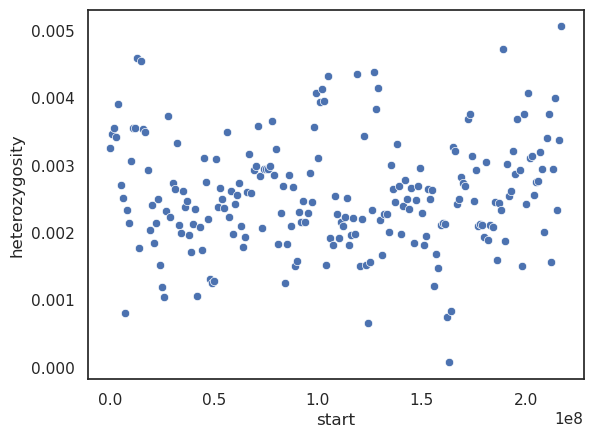

In [27]:
sns.scatterplot(data=df_l2[0], x="start", y="heterozygosity")

<Axes: xlabel='start', ylabel='heterozygosity'>

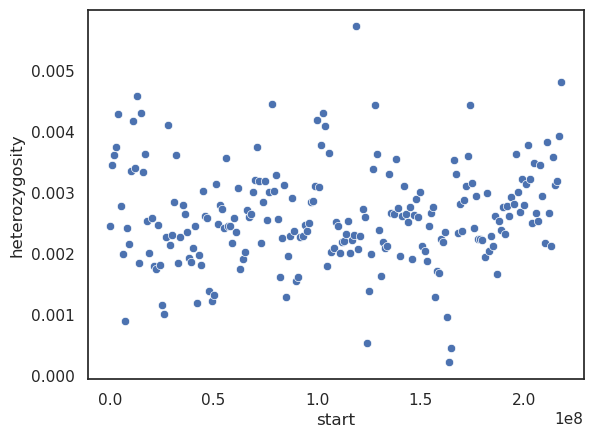

In [28]:
sns.scatterplot(data=df_l1[0], x="start", y="heterozygosity")

<Axes: xlabel='start', ylabel='heterozygosity'>

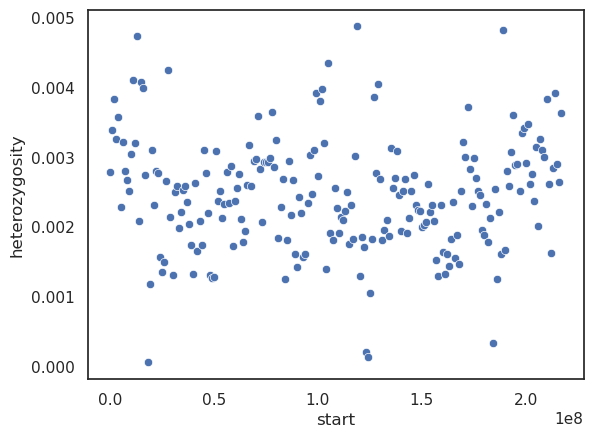

In [29]:
sns.scatterplot(data=df_l2[1], x="start", y="heterozygosity")

<Axes: xlabel='start', ylabel='heterozygosity'>

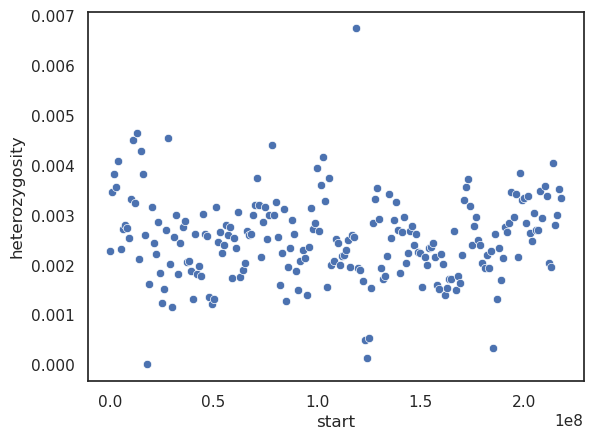

In [30]:
sns.scatterplot(data=df_l1[1], x="start", y="heterozygosity")

Fst stats on the yellow baboons.

In [31]:
def read_beds(long_form):
    bed_path_x = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024/{}/filteredVCF/pos_bed_cov_based/{}_batch*_fploidy2_mploidy1.bed".format(long_form, long_form)
    bed_path_all = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024/{}/filteredVCF/pos_bed_cov_based/{}_batch*_fploidy2_mploidy2.bed".format(long_form, long_form)
    bed_l = []
    for b in glob.glob(bed_path_x):
        bed_file = pd.read_csv(b, sep="\t", names=["chrom", "start", "end"])
        bed_l.append(bed_file)
    bed_x = pd.concat(bed_l)

    bed_l = []
    for b in glob.glob(bed_path_all):
        bed_file = pd.read_csv(b, sep="\t", names=["chrom", "start", "end"])
        bed_l.append(bed_file)
    bed_files = pd.concat(bed_l)
    bed_files = bed_files.loc[~(bed_files.chrom.isin(bed_x.chrom.unique()))]
    bed_files = pd.concat([bed_files, bed_x]).sort_values(by=["chrom", "start", "end"])
    return bed_files

def pos_windows(bed_l, window_size, chrom_order):
    # Input a bed file and the window size of intervals desired. Multiple chromosomes accepted.
    # It has to be sorted.
    df_l = []
    for c in chrom_order:
        frac_l = []
        b = bed_l.loc[bed_l["chrom"] == c].copy()
        b["w_s"] = b.end-b.start
        w_start = b.start.iloc[0]
        current_pos, callable_bases = 0, 0
        for i, j, k in zip(b.start, b.end, b.w_s):
            # Nothing called in the current window under investigation.
            while i-window_size >= current_pos:
                frac_l.append(callable_bases/window_size)
                callable_bases = 0
                current_pos += window_size
            # Window starts in current. We know this is true because of the previous while loop.
            callable_bases += min(k, current_pos+window_size-i)
            # Everything called in current.
            while j-window_size >= current_pos:
                frac_l.append(callable_bases/window_size)
                callable_bases = 0
                current_pos += window_size
                if j-window_size >= current_pos:
                    callable_bases += window_size
                else:
                # Window stops in current. Again, know this is true.
                    callable_bases += j-current_pos
        # Last window.
        frac_l.append(callable_bases/(window_size))
        df_l.append(pd.DataFrame({"chrom": c, "window_start": list(range(0, len(frac_l)*window_size, window_size)),
                                  "window_end": list(range(window_size, (len(frac_l)+1)*window_size, window_size)),
                                  "callable_frac": frac_l}))
    return pd.concat(df_l)

In [ ]:
size_cutoff = 1000000
window_size = 100000
for x in ['../data/Papio_cynocephalus_ssp/']:
    # The name used to load all the files, short and long version
    short_form = x.split("/")[-2].split("_")[0]
    long_form = x.split("/")[-2]
    print(long_form)
    # Loading the various metadata files. Metadata, contig information, callability bed.
    metadata_path = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"
    metadata_df = pd.read_csv(metadata_path+"{}_individuals.txt".format(short_form), sep="\t")
    metadata_df["SEX_I"] = [0 if x == "F" else 1 for x in metadata_df.GENETIC_SEX]
    regions_df = pd.read_csv(metadata_path+"{}_regions_and_batches.txt".format(short_form), sep="\t")
    regions_df["LENGTH"] = regions_df["END"]-regions_df["START"]
    large_contigs = regions_df.loc[(regions_df.LENGTH >= size_cutoff) & (regions_df.FEMALE_PLOIDY == 2)].CONTIG_ID.unique()
    large_x = regions_df.loc[(regions_df.LENGTH >= size_cutoff) & (regions_df.FEMALE_PLOIDY == 2) &
                        (regions_df.MALE_PLOIDY == 1)].CONTIG_ID
    bed_files = read_beds(long_form)
    # Loading the genetic data.
    ds = sg.load_dataset("../data/{}".format(long_form))
    sex_map = dict(zip(metadata_df.GVCF_ID, metadata_df.SEX_I))
    # If you want to split based on sex. I will make every individual unique
    #ds["sample_cohort"] = xr.DataArray(pd.Series(ds.sample_id.values).map(sex_map), dims="samples")
    ds["sample_cohort"] = ds["samples"]
    # Only keeping contigs which are above the cutoff (1Mb or more)
    kept_contigs =  [x for x in ds.contig_id.values if (x == large_contigs).any()]
    contig_IDs = pd.Series(kept_contigs).map(dict(zip(ds.contig_id.values, range(len(ds.contig_id.values))))).values
    # This selection is heavy, but is needed to make sure that windowing steps doesn't crash
    # as the windowing step requires contigs to contain variants.
    ds = ds.sel(variants=(ds.variant_contig.isin(contig_IDs).compute()), contigs=contig_IDs)

Papio_cynocephalus_ssp


In [100]:
ds

<xarray.Dataset> Size: 2MB
Dimensions:                   (variants: 0, alleles: 2, samples: 80,
                               genotypes: 3, ploidy: 2, filters: 2,
                               region_index_values: 65126,
                               region_index_fields: 6)
Dimensions without coordinates: variants, alleles, samples, genotypes, ploidy,
                                filters, region_index_values,
                                region_index_fields
Data variables: (12/61)
    variant_n_called          (variants) int64 0B dask.array<chunksize=(0,), meta=np.ndarray>
    variant_call_rate         (variants) float64 0B dask.array<chunksize=(0,), meta=np.ndarray>
    variant_n_het             (variants) int64 0B dask.array<chunksize=(0,), meta=np.ndarray>
    variant_n_hom_ref         (variants) int64 0B dask.array<chunksize=(0,), meta=np.ndarray>
    variant_n_hom_alt         (variants) int64 0B dask.array<chunksize=(0,), meta=np.ndarray>
    variant_n_non_ref         (variants) int64 0B dask.array<chunksize=(0,), meta=np.ndarray>
    ...                        ...
    variant_id                (variants) object 0B dask.array<chunksize=(0,), meta=np.ndarray>
    variant_id_mask           (variants) bool 0B dask.array<chunksize=(0,), meta=np.ndarray>
    variant_length            (variants) int16 0B dask.array<chunksize=(0,), meta=np.ndarray>
    variant_position          (variants) int32 0B dask.array<chunksize=(0,), meta=np.ndarray>
    variant_quality           (variants) float32 0B dask.array<chunksize=(0,), meta=np.ndarray>
    sample_cohort             (samples) int64 640B 0 1 2 3 4 ... 75 76 77 78 79
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2

In [92]:
ds.sample_id.values

array(['SAMEA112482966', 'SAMEA112482967', 'SAMEA112482968',
       'SAMEA112482969', 'SAMEA112482970', 'SAMEA112482976',
       'SAMEA112482977', 'SAMEA112482978', 'SAMEA112482979',
       'SAMEA112482980', 'SAMEA112482981', 'SAMEA112482982',
       'SAMEA112482983', 'SAMEA112482984', 'SAMEA112482985',
       'SAMEA112482986', 'SAMEA112482987', 'SAMEA112482988',
       'SAMEA112482989', 'SAMEA112482990', 'SAMEA112483021',
       'SAMEA112483022', 'SAMEA112483023', 'SAMEA112483024',
       'SAMEA112483025', 'SAMEA112483212', 'SAMEA112483213',
       'SAMEA112483214', 'SAMEA112483215', 'SAMEA112483219',
       'SAMEA112483220', 'SAMEA112483221', 'SAMEA112483222',
       'SAMEA112483223', 'SAMEA112483224', 'SAMEA112483228',
       'SAMEA112483229', 'SAMEA112483230', 'SAMEA112483231',
       'SAMEA112483232', 'SAMEA112483233', 'SAMEA112483234',
       'SAMEA112483235', 'SAMEA112483236', 'SAMEA112483237',
       'SAMEA112483238', 'SAMEA112483239', 'SAMEA112483240',
       'SAMEA112483241',

<Axes: xlabel='AVG_COVERAGE_A', ylabel='Count'>

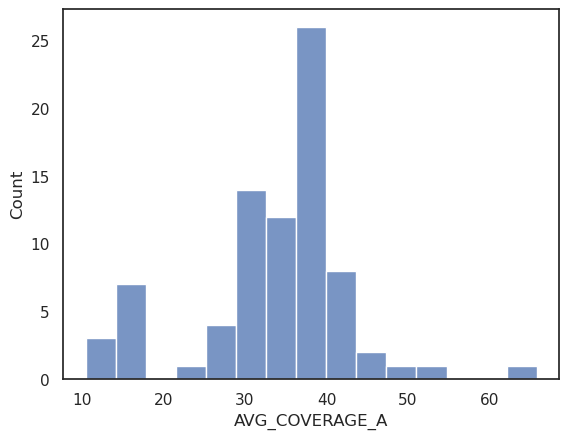

In [65]:
sns.histplot(metadata_df.loc[(metadata_df.GVCF_ID.isin(ds.sample_id.values))].AVG_COVERAGE_A)

In [63]:
metadata_df.loc[(metadata_df.GVCF_ID.isin(ds.sample_id.values))]

,BIOSAMPLE_ID,PDGP_ID,GVCF_ID,SRA_SAMPLE_ID,BIOPROJECT_ID,BAM_FOLDER,GVCF_FOLDER,REFERENCE_FOLDER,GENUS,SPECIES,SUBSPECIES,REPORTED_SEX,GENETIC_SEX,AVG_COVERAGE_A,PROP_COVERED_A,AVG_COVERAGE_X,PROP_COVERED_X,AVG_COVERAGE_Y,PROP_COVERED_Y,SEX_I
145,SAMN20814945,SAMN20814945,SAMN20814945,SRS9870251,PRJNA755322,Papio_cynocephalus_anubishybrid,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,anubishybrid,Unknown,M,37.317,0.988,19.440,0.966,24.980,0.941,1
149,SAMN20814949,SAMN20814949,SAMN20814949,SRS9870256,PRJNA755322,Papio_cynocephalus_anubishybrid,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,anubishybrid,Unknown,M,42.471,0.989,22.135,0.967,26.905,0.956,1
427,SAMN20815227,SAMN20815227,SAMN20815227,SRS9870252,PRJNA755322,Papio_cynocephalus_anubishybrid,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,anubishybrid,Unknown,F,38.762,0.988,39.011,0.967,40.290,0.165,0
522,SAMN20815322,SAMN20815322,SAMN20815322,SRS9870254,PRJNA755322,Papio_cynocephalus_anubishybrid,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,anubishybrid,Unknown,F,41.393,0.988,39.859,0.967,46.340,0.165,0
523,SAMN20815323,SAMN20815323,SAMN20815323,SRS9870257,PRJNA755322,Papio_cynocephalus_anubishybrid,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,anubishybrid,Unknown,F,34.789,0.988,33.988,0.967,39.667,0.168,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,SAMN20814902,SAMN20814902,SAMN20814902,SRS9921776,PRJNA755322,Papio_cynocephalus_ssp,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,ssp,Unknown,M,14.571,0.986,7.502,0.948,9.759,0.922,1
640,SAMN20814903,SAMN20814903,SAMN20814903,SRS9921779,PRJNA755322,Papio_cynocephalus_ssp,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,ssp,Unknown,F,15.754,0.987,15.794,0.966,17.241,0.165,0
641,SAMN20814904,SAMN20814904,SAMN20814904,SRS9921777,PRJNA755322,Papio_cynocephalus_ssp,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,ssp,Unknown,M,14.881,0.987,7.644,0.956,9.270,0.929,1
642,SAMN20814905,SAMN20814905,SAMN20814905,SRS9921778,PRJNA755322,Papio_cynocephalus_ssp,Papio_cynocephalus_ssp,Papio_anubis_ssp,Papio,cynocephalus,ssp,Unknown,F,13.073,0.986,12.941,0.965,14.788,0.159,0


<Axes: ylabel='Count'>

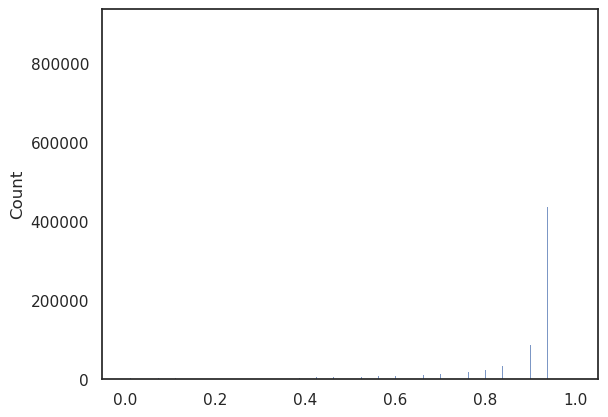

In [93]:
# Calculate and visualize missing rate.
ds = sg.variant_stats(ds)
sns.histplot(ds.variant_call_rate)

In [94]:
pd.Series(ds.variant_call_rate[:100000].values).value_counts()

0.9625    18079
0.9750    17104
0.9500    13808
0.9875    10574
0.9375     8528
          ...  
0.0250       40
0.0625       35
0.0500       32
0.1125       30
0.0375       27
Name: count, Length: 81, dtype: int64

In [96]:
ds

<xarray.Dataset> Size: 21GB
Dimensions:                   (variants: 4561152, alleles: 2, samples: 80,
                               genotypes: 3, ploidy: 2, contigs: 3, filters: 2,
                               region_index_values: 65126,
                               region_index_fields: 6)
Dimensions without coordinates: variants, alleles, samples, genotypes, ploidy,
                                contigs, filters, region_index_values,
                                region_index_fields
Data variables: (12/61)
    variant_n_called          (variants) int64 36MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_call_rate         (variants) float64 36MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_n_het             (variants) int64 36MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_n_hom_ref         (variants) int64 36MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_n_hom_alt         (variants) int64 36MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_n_non_ref         (variants) int64 36MB dask.array<chunksize=(999,), meta=np.ndarray>
    ...                        ...
    variant_id                (variants) object 36MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_id_mask           (variants) bool 5MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_length            (variants) int16 9MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_position          (variants) int32 18MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_quality           (variants) float32 18MB dask.array<chunksize=(999,), meta=np.ndarray>
    sample_cohort             (samples) int64 640B 0 1 2 3 4 ... 75 76 77 78 79
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2

In [97]:
# Only uses variants which are called in all samples.
ds_full_call = ds.isel(variants=(ds.variant_call_rate >= 0.8).compute())
ds_full_call = sg.window_by_position(ds_full_call, size=window_size)
ds_full_call

IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
sg.window_by_position(ds_full_call, size=window_size)

In [ ]:
# Lets see if it crashes with this input size
ds_full_call = sg.Fst(ds_full_call)

In [ ]:
ds_full_call

In [ ]:
ds_full_call.stat_Fst

In [ ]:
ds_full_call.call_genotype[:2].values

In [ ]:
ds_full_call.variant_position[:100].values

In [ ]:
# Why is everything nan?
ds_full_call.stat_divergence[100:101].values

In [ ]:
ds_full_call.stat_divergence[100:101].values

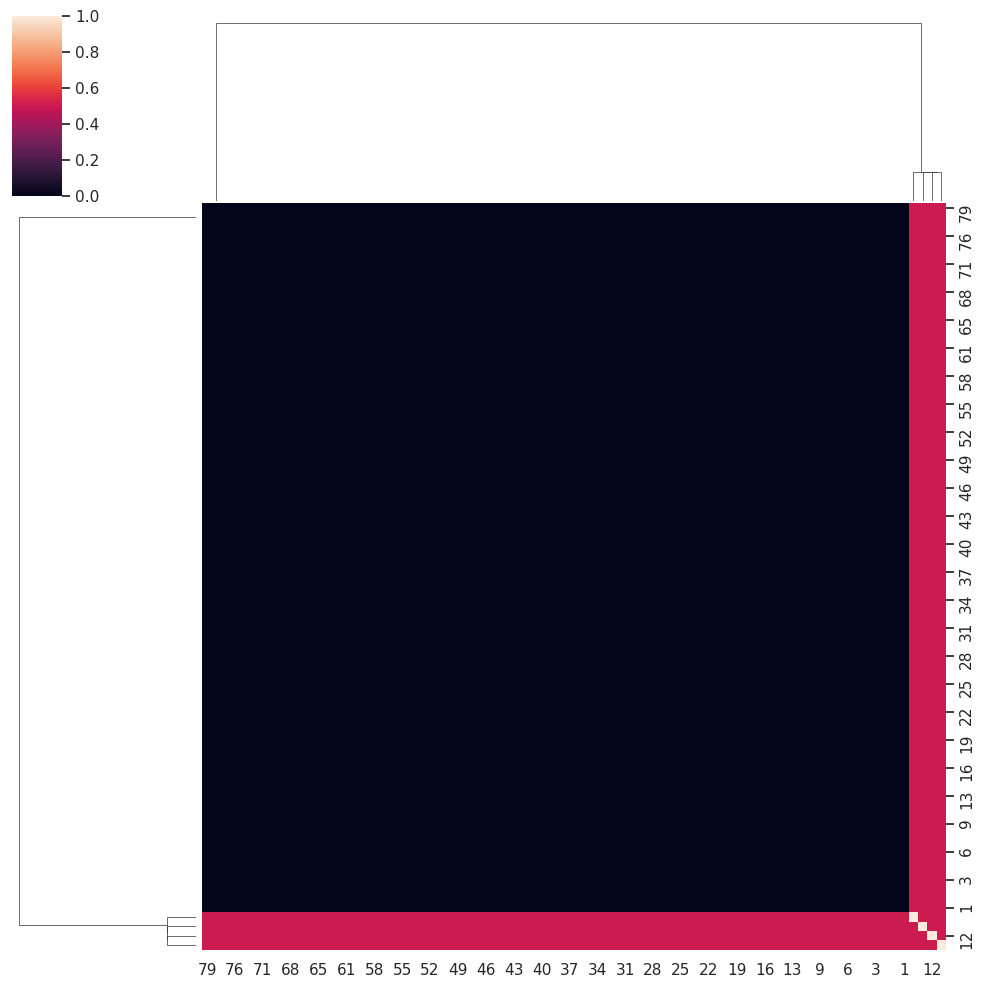

In [74]:
sns.clustermap(np.nan_to_num(ds_full_call.stat_divergence[100:101].values)[0])